# Web Development

## Concepts

### Components of a Webservice

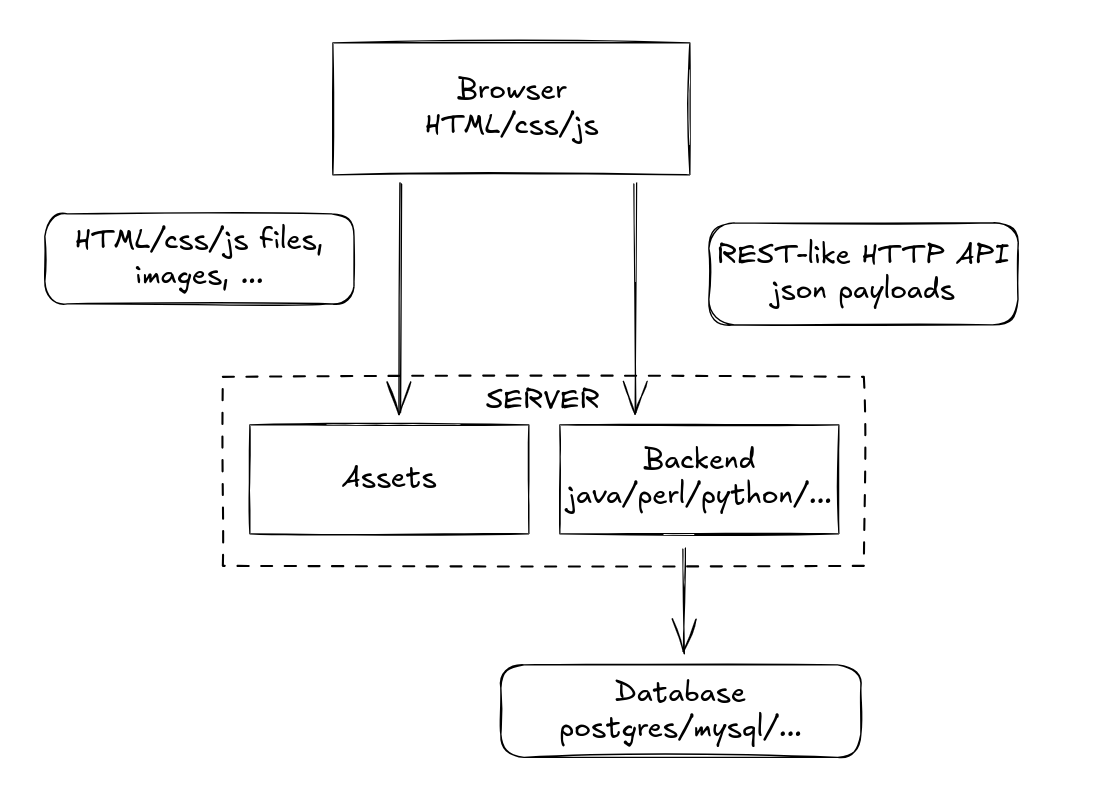

### Communications via HTTP

- Web services communicate via HTTP: **HyperText Transfer Protocol**
- Application layer, highest layer in OSI model
- So it always relies on functionalities from lower layers (eg TCP/IP)
- HTTP is stateless: each request is independent
- State can be kept explicitly e.g. via cookies

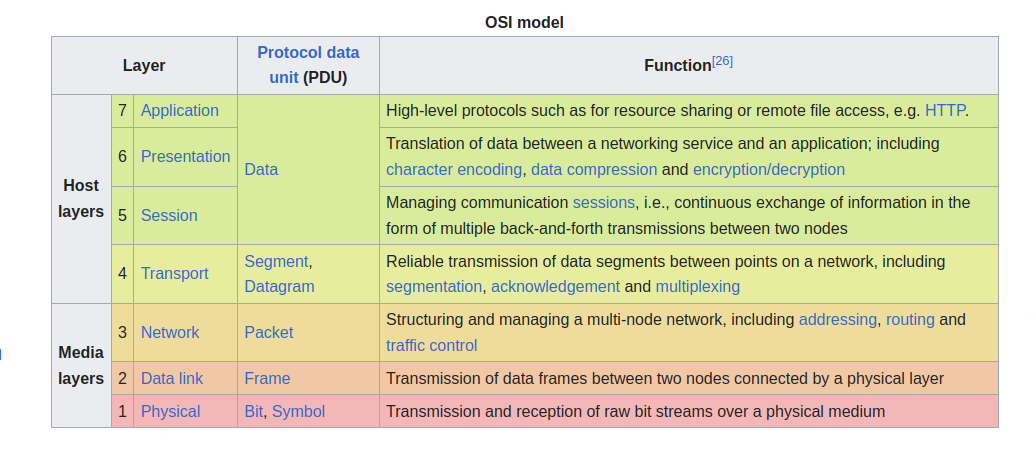
(soure: [wikipedia](https://en.wikipedia.org/wiki/OSI_model))

An HTTP requests consists of
- **URL**: The resource being requested.
- **Method**: The action to perform (e.g., GET, POST).
- **Headers**: Metadata about the request (e.g., user agent, content type).
- **Body** (optional): Data sent with the request (e.g., form data).

```
GET /index.html HTTP/1.1
Host: www.example.com
User-Agent: Mozilla/5.0
Accept: text/html
```

The server returns a response with
- **Status Code**: Indicates success or failure of the request(e.g. 200 OK, 404 Not Found).
- **Headers**: Metadata about the response  (e.g., content type, caching instructions).
- **Body** (optional): Data returned by the server, e.g. a website

```
HTTP/1.1 200 OK
Content-Type: text/html; charset=UTF-8
Content-Length: 137

<html>
  <head><title>Example</title></head>
  <body><p>This is an example response.</p></body>
</html>
```

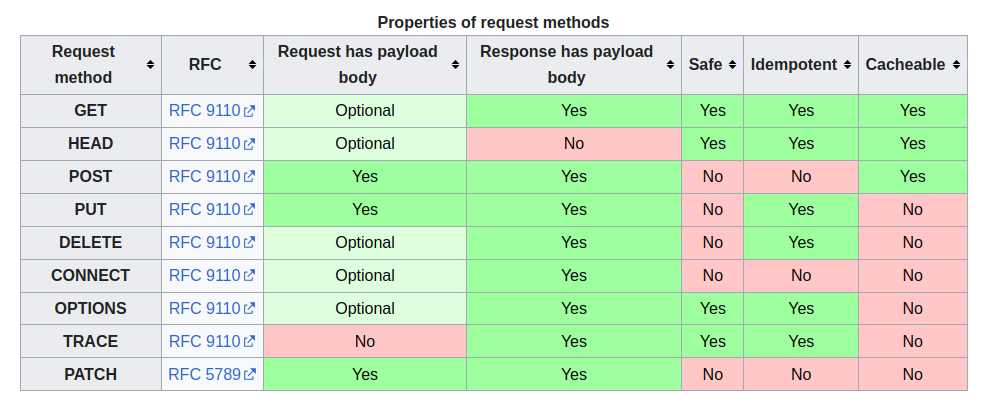
(source: [wikipedia](https://en.wikipedia.org/wiki/HTTP#Request_methods))

**Response Status Codes**:
 - 1xx: Request received, continue processing.
 - 2xx: Successful
   - 200: OK
 - 3xx: Redirection
 - 4xx: Client Error
   - 400: Bad Request
   - 403: Forbidden
   - 404: Not Found
 - 5xx: Server Error
   - 500: Internal Server Error 

## Client

- `requests` is /the/ standard library for making HTTP request from Python
> Requests allows you to send HTTP/1.1 requests extremely easily. There’s no need to manually add query strings to your URLs, or to form-encode your PUT & POST data — but nowadays, just use the json method!

- Install as always: `pip install requests`
- See [Documentation](https://requests.readthedocs.io/en/latest/) for more details


In [ ]:
import requests

In [ ]:
response = requests.get('https://jsonplaceholder.typicode.com/posts/')
response

In [ ]:
response.status_code

In [ ]:
response.content[:1000]

In [ ]:
response.headers

In [ ]:
response.headers['Content-Type']

In [ ]:
response.json()[:3]

In [ ]:
# if we want to see what we sent to the server
response.request.headers

In [ ]:
response = requests.get('https://jsonplaceholder.typicode.com/posts/1')
response

In [ ]:
response = requests.get('https://jsonplaceholder.typicode.com/posts/300')
response

In [ ]:
payload = {
    'userId': 1,
    'title': 'Python is awesome',
    'body': 'Well, I really think so...'
}

response = requests.post('https://jsonplaceholder.typicode.com/posts', json=payload)
print(response.status_code, response.json())

In [ ]:
payload = {
    'userId': 1,
    'title': 'Python is awesome',
    'body': 'Well, I really think so...',
    'id': 17
}

response = requests.put('https://jsonplaceholder.typicode.com/posts/17', json=payload)
print(response.status_code, response.json())

In [ ]:
help(requests.delete)

In [ ]:
help(requests.patch)

In [ ]:
# below examples use httpbin, which just mirrors back our request
# modify headers

response = requests.get('https://httpbin.org/get', headers={'User-Agent': 'ppp-2025'})
response.json()

In [ ]:
# adding parameters in the url
response = requests.get('https://httpbin.org/get', params={'some_key': 'some_value'})
response.json()

In [ ]:
# post with form data
response = requests.post('https://httpbin.org/post', data={'some_key': 'some_value'})
response.json()

In [ ]:
response = requests.post('https://httpbin.org/post', json={'some_key': 'some_value'})
response.json()

In [ ]:
response = requests.get('https://httpbin.org/cookies/set', params={'cookie_name': 'cookie_value'})
response.json()

In [ ]:
response = requests.get('https://httpbin.org/cookies')
response.json()

In [ ]:
# session objects can be used for e.g. persistent cookies
with requests.Session() as session:
    session.get('https://httpbin.org/cookies/set', params={'cookie_name': 'cookie_value'})
    response = session.get('https://httpbin.org/cookies')
response.json()

## Databases

#### **Traditional (Relational) Databases**
- Data stored in tables with rows and columns.
- Uses SQL (Structured Query Language) for queries.
  - Different DBMS speak different SQL dialects, though
- Enforces relationships via foreign keys.
- Strong ACID compliance (Atomicity, Consistency, Isolation, Durability).

**Examples:**
- PostgreSQL
- MySQL
- SQLite (part of Python standard library!)
- Microsoft SQL Server
- ...

#### No-SQL Databases
Designed for flexibility, scalability, and performance, but giving fewer guarantees on ACID criteria.

Used for Large-scale applications with unstructured data, Real-time analytics, caching, and dynamic schemas.


**Types:**
- Document Stores: MongoDB, CouchDB
  - Data stored as JSON-like documents.
- Key-Value Stores: Redis, DynamoDB
  - Simple key-value pairs, optimized for fast lookups.
- Columnar Stores: Cassandra, HBase
  - Data stored in columns for analytics and big data. (OLAP vs OLTP)
- Graph Databases: Neo4j, ArangoDB
  - Models relationships as graphs.



| Feature | Relational | Non-Relational |
| :- | :-: | :-: |
| **Schema** | Rigid, predefined | Flexible, dynamic |
| **Relationships** | Enforced via keys | Represented in documents/graphs |
| **Scalability** | Vertical | Horizontal |
| **Query Language** | SQL-like | Varies (e.g., JSON-like syntax) |
| **Use Cases** | Transaction-heavy apps | Big data, real-time apps |

### Talking to Databases directly

- typically a DBMS runs as a separate process (and potentially on a different server)
- there are some in-process DBMS useful for small applications and prototypes -- sqlite3 in particular
- Python defines a [common API](https://peps.python.org/pep-0249/) for libraries providing access to databases
- This allows to some extent to swap out the database system to a different one
- But there might be differences in the SQL dialects and features supported by each DBMS 

In [ ]:
import sqlite3 as db
from uuid import uuid4

In [ ]:
# constraints (e.g. uniqueness) are enforced by the DBMS

user_id = uuid4()
user_name = 'atreju'

with db.connect('demo.db') as conn:  # can also just use :memory: for an ephemereal database
    cursor = conn.cursor()
    cursor.execute('CREATE TABLE IF NOT EXISTS users (user_id uuid4 PRIMARY KEY NOT NULL, user_name str)')
    cursor.execute('INSERT INTO users VALUES(?, ?)', (str(user_id), user_name))
    response = cursor.execute('SELECT * FROM users').fetchall()
response


### Talking to databases via ORM

- An ORM abstracts database operations into Python objects and classes.
- Eliminates the need to write raw SQL queries. That also means it takes care of different dialects for you.
- Maps tables to classes and rows to objects.
- Validates data in Python, rather than waiting for errors from the DB.
- But does not offer all the power and flexibility of raw SQL queries.

In [ ]:
from sqlalchemy import create_engine, Column, Integer, String, UUID
from sqlalchemy.orm import declarative_base
from sqlalchemy.orm import sessionmaker
from uuid import uuid4

Base = declarative_base()

class User(Base):
    __tablename__ = 'users'
    id = Column(UUID, primary_key=True, default=uuid4)
    name = Column(String)
    email = Column(String)

engine = create_engine('sqlite:///alchemy.db')
Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

# Insert data
# sqlalchemy also makes sure to sanitize inputs!
new_user = User(name='Atreju', email='atreju.tauschinsky@gmx.de')
session.add(new_user)
session.commit()

# Query data
for user in session.query(User).filter_by(name='Atreju'):
    print(user.id, user.name, user.email)


In [ ]:
with db.connect('alchemy.db') as conn:  # sqlalchemy created a regular old sqlite-db, can also access directly
    cursor = conn.cursor()
    response = cursor.execute('SELECT * FROM users').fetchall()
response

## Server-Side Frameworks

### FastAPI

**Overview:**
- Modern, high-performance framework for building APIs.
- **Primary Use Case:** (REST) API development with asynchronous capabilities and type safety.
  - so for backend (micro-)services rather than entire 'websites' 

**Key Features:**
- Built on Starlette (web) and Pydantic (validation).
- Asynchronous support for high performance.
- Auto-generated, interactive API documentation with Swagger and Redoc.
- Type hints to validate data and improve developer productivity.
- requires async server to run, e.g. [uvicorn](https://www.uvicorn.org/)

---

### Flask

**Overview:**
- General-purpose microframework.
- **Primary Use Case:** Building web applications and APIs with flexibility and minimal setup.
  - so use Flask if you want integrated HTML/templating as well as REST APIs, but are willing to make some compromises on backend features
 
**Key Features:**
- Lightweight and modular, with an easy-to-understand structure.
- Extensions for adding functionality (e.g., Flask-SQLAlchemy, Flask-WTF).
- Jinja2 templating engine for server-side rendered HTML.
- can be run with builtin development server, but should use a 'real' server process (e.g. [gunicorn](https://gunicorn.org/)) in production

**Alternatives:**
- **Django**:
  - Full-Stack framework, more features out-of-the-box (ORM, authentication, cache, ...)
  - Steeper Learning curve, more complexity for small applications
  - Good for large-scale, enterprise-level applications

---

### Streamlit:

**Overview:**
- Framework for creating interactive data apps.
- **Primary Use Case:** Rapidly prototyping and deploying machine learning dashboards or data visualizations.

**Key Features:**
- Simplified syntax for creating UI elements.
- Optimized for ML/data scientists, no front-end experience required.
- Automatically updates based on script changes or user inputs.
- builtin server process
- Good for building quick, interactive visualizations without dealing with web development complexities.

---

### Comparison

| Feature | Flask | FastAPI | Streamlit |
| :- | :-: | :-: | :-: |
| **Primary Use Case** | General-purpose apps and APIs | High-performance APIs | Data science dashboards and UIs |
| **Ease of Use**             | Simple but requires more boilerplate | Simple and type-driven                | Extremely simple, minimal coding      |
| **Performance**             | Good, depends on extensions           | Excellent, asynchronous by default    | N/A (optimized for UI, not servers)  |
| **Asynchronous Support**    | Requires manual integration           | Built-in (async/await)                | No async support, single-threaded     |
| **API Documentation**       | Requires external tools (e.g., Flask-RESTPlus) | Auto-generated (Swagger, Redoc)      | No native API capabilities            |
| **Templating**              | Jinja2                                | None (template engines are external)  | No HTML templating; widget-based UI   |
| **Community Support**       | Large, mature ecosystem               | Growing quickly, modern tooling       | Niche, data science-focused           |
| **Learning Curve**          | Moderate                             | Low (if familiar with type hints)     | Very low (Python scripting only)      |
| **Best For**                | Custom, flexible projects             | APIs and microservices                | Prototyping ML/data dashboards        |



# Testing FastAPI endpoints

In [ ]:
import requests
import pandas as pd

In [ ]:
resp = requests.get('http://localhost:3334/iris')

In [ ]:
resp.json()

In [ ]:
pd.DataFrame(resp.json())

In [ ]:
resp = requests.get('http://localhost:3334/iris', params={'max_sepal_length': 4.5})
pd.DataFrame(resp.json())

In [ ]:
resp = requests.get('http://localhost:3334/iris', params={'max_sepal_length': 'foo'})
resp.status_code

In [ ]:
resp.json()